<a href="https://colab.research.google.com/github/nkoser/Hackathon_Waterkant_Lung_challenge/blob/main/Waterkant_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#for colab users only - mounting the drive 
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

#setup a base directory where everything will be installed - repo, dataset, libraries
#This .ipynb notebook needs to placed there as well.
import os
base_dir = '/content/drive/My Drive/Colab Notebooks'
os.chdir(base_dir)

Mounted at /content/drive


In [2]:
# You only need to do this once, once you have 
# done this once with your Google Drive account. 
!git clone https://github.com/MIC-DKFZ/nnUNet.git
!git clone https://github.com/NVIDIA/apex
!git clone https://github.com/deepmind/surface-distance.git

# Loading pretrained nnUNet
!wget -O nnUNet_trained-model.zip  https://cloud.rz.uni-kiel.de/index.php/s/pKYfzq8ZYQ6Strg/download
!unzip nnUNet_trained-model.zip
!rm -r nnUNet_trained-model.ziA
p

# Loading Ground Truth Segmenation
!wget -O img_ls.zip https://cloud.rz.uni-kiel.de/index.php/s/BAB4trs6qaYg5xw/download
!unzip img_ls.zip
!rm -r img_ls.zip

fatal: destination path 'nnUNet' already exists and is not an empty directory.
fatal: destination path 'apex' already exists and is not an empty directory.
fatal: destination path 'surface-distance' already exists and is not an empty directory.
--2022-06-04 13:39:15--  https://cloud.rz.uni-kiel.de/index.php/s/pKYfzq8ZYQ6Strg/download
Resolving cloud.rz.uni-kiel.de (cloud.rz.uni-kiel.de)... 134.245.10.129
Connecting to cloud.rz.uni-kiel.de (cloud.rz.uni-kiel.de)|134.245.10.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘nnUNet_trained-model.zip’

nnUNet_trained-mode     [     <=>            ] 101.84M  15.8MB/s               ^C
Archive:  nnUNet_trained-model.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzi

In [3]:
#colab users - Do this everytime
#local machines - Once is enough
respository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(respository_dir)

!pip install -e .
#(optional installation)
!pip install --upgrade git+https://github.com/nanohanno/hiddenlayer.git@bugfix/get_trace_graph#egg=hiddenlayer

os.chdir(base_dir)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/nnUNet
     |████████████████████████████████| 151 kB 8.5 MB/s 
     |████████████████████████████████| 61 kB 324 kB/s 
     |████████████████████████████████| 48.4 MB 1.2 MB/s 
     |████████████████████████████████| 96 kB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 36.9 MB/s 
  Created wheel for batchgenerators: filename=batchgenerators-0.24-py3-none-any.whl size=89210 sha256=93fcee9cb1fc914235175e0e5bdd3ce64b662553106ea7e5a722bf6426942530
  Stored in directory: /root/.cache/pip/wheels/56/d7/ca/6b43d8fbc8e1d38a89e902cd0cf5aeeb35501ba3c95e3ce8e7
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.3-py3-none-any.whl size=44349 sha256=05129241c875304699448c7b098a820365f20b86096f4d2bef65f69669040f04
  Stored in directory: /root/.cache/pip/wheels/c3/fa/ce/46cd4de391842020d4ee1d2de6ab58ae857384f4c05f384e75
  Creat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nanohanno/hiddenlayer.git (to revision bugfix/get_trace_graph) to /tmp/pip-install-8l6w0z_a/hiddenlayer_caa49c2a47234f79bd59dd79ee69ecc7
  Running command git clone -q https://github.com/nanohanno/hiddenlayer.git /tmp/pip-install-8l6w0z_a/hiddenlayer_caa49c2a47234f79bd59dd79ee69ecc7
  Running command git checkout -b bugfix/get_trace_graph --track origin/bugfix/get_trace_graph
  Switched to a new branch 'bugfix/get_trace_graph'
  Branch 'bugfix/get_trace_graph' set up to track remote branch 'bugfix/get_trace_graph' from 'origin'.
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=19748 sha256=25f3dad6272d19182f7a1adb2dfa3a1caddbdc18669ab991c7447acf72792829
  Stored in directory: /tmp/pip-ephem-wheel-cache-pynsnmk4/wheels/0f/3c/46/3186246513d3a9b8ac0784f551043ede398addafc2d15c2cd6
Successfully built hiddenlayer


In [4]:
#libraries
import shutil
from collections import OrderedDict
import json
import numpy as np

#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib


#for colab users only - keep the base directory same as above
import os
base_dir = "/content/drive/My Drive/Colab Notebooks"
repository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(base_dir)

if os.getcwd()==base_dir:
    print('We are in the correct directory')
else:
    print("Run set base directory step again, then check to verify.")

We are in the correct directory


## Creating Results Folder, later you will find it in content/myDrive/Colab Notebooks/

In [8]:
!rm -r results
!mkdir results

## Upload your SR CT-Scans and start inference
To test your generated data, you have to upload your images yourself once, this can be done under the following folder on the right side. You will find it after executing the lower code line under drive/MyDrive/Colab Notebooks/img_data

In [ ]:
!mkdir img_data

In [6]:
os.environ['RESULTS_FOLDER'] = os.path.join('/content/drive/MyDrive/Colab Notebooks/nnUNet_trained-model')

In [ ]:
!nnUNet_predict -i '/content/drive/MyDrive/Colab Notebooks/img_data' -o '/content/drive/MyDrive/Colab Notebooks/results' -t 501 -m 3d_fullres -f 0 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

nnUNet_raw_data_base is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot be used for experiment planning and preprocessing like this. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up properly.
nnUNet_preprocessed is not defined and nnU-Net can not be used for preprocessing or training. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up.
using model stored in  /content/drive/MyDrive/Colab Notebooks/nnUNet_trained-model/nnUNet/3d_fullres/

## Evaluation

In [6]:
!pip install surface-distance/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./surface-distance
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for Surface-Distance-Based-Measures: filename=Surface_Distance_Based_Measures-0.1-py3-none-any.whl size=14357 sha256=4ced10d91cdff5dd149b9ff75e69a636e709f92a0d914c633e04e909d02ff75a
  Stored in directory: /root/.cache/pip/wheels/7a/39/b0/1bef989486358b7051b73987c6562c2a5c6494ba06fdd1dee1
Successfully built Surface-Distance-Based-Measures


In [53]:
from surface_distance import compute_surface_distances, compute_average_surface_distance, compute_robust_hausdorff
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import glob
import SimpleITK as sitk
import torch
import pandas as pd
import seaborn as sns

In [62]:
def compute_hausdorff(gt,pred,spacing=np.array([1,1,1])):

    temp = []
    for i in range(33):
        surfaces = compute_surface_distances(gt.bool().cpu().numpy(),
                                             pred.bool().cpu().numpy(),
                                             spacing)
        hs = compute_robust_hausdorff(surfaces,0.95)
        gt_to_pred = surfaces['distances_gt_to_pred'] if len(surfaces['distances_gt_to_pred']) > 0 else [0]
        pred_to_gt = surfaces['distances_pred_to_gt'] if len(surfaces['distances_pred_to_gt']) > 0 else [0]
        hs = max(max(gt_to_pred), max(pred_to_gt))
        temp.append(hs)
    return torch.tensor(temp)

def dice_coeff(outputs, labels, max_label):

    dice = torch.FloatTensor(max_label-1).fill_(0)
    for label_num in range(1, max_label):
        iflat = (outputs==label_num).view(-1).float()
        tflat = (labels==label_num).view(-1).float()
        intersection = torch.mean(iflat * tflat)
        dice[label_num-1] = (2. * intersection) / (1e-8 + torch.mean(iflat) + torch.mean(tflat))
    return dice

def create_box_plot(metric_name,values,out_name): 
    d = {metric_name: values[0]}
    df1 = pd.DataFrame(data=d)
    df1['Level'] = 'Trachea'

    d = {metric_name: values[1]}
    df2 = pd.DataFrame(data=d)
    df2['Level'] = 'Primary'

    d = {metric_name: values[2]}
    df3 = pd.DataFrame(data=d)
    df3['Level'] = 'Secondary'

    d = {metric_name: values[3]}
    df4 = pd.DataFrame(data=d)
    df4['Level'] = 'Tertiary'

    df = pd.concat([df1,df2,df3,df4])

    # sns.stripplot(y=df[metric], x=df['configuration'], color='black', alpha=0.3)
    sns.boxplot(y=df[metric_name], x=df['Level'], showmeans=True)
    plt.savefig(out_name)
    plt.clf()

def plot_overlays(img,seg,out_name):

    p = cm.get_cmap('tab20b', 33)
    new_map = p(np.linspace(0, 1, 33))
    new_color =  np.array([1,1,1, 0])
    new_map[:1,:] = new_color
    cmp = ListedColormap(new_map)
    cmp
    
    nr_slice = 103
    fig,ax = plt.subplots(figsize=(5, 5))
    
    ax.set_title('Overlay')
    ax.axis('off')
    ax.imshow(img[:,nr_slice,:].flip(0),'gray')
    ax.imshow(seg[:,nr_slice,:].flip(0), cmap=cmp, alpha=0.8)
    
    fig.savefig(out_name)


In [16]:
# loading the created CT-Scans for Overlaying your Segmentation result
ct_scans_path = glob.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/img_data','*.nii.gz'))
ct_scans_path.sort()

predicted_seg_path = glob.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/results','*.nii.gz'))
predicted_seg_path.sort()

gt_seg_path = glob.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/gt_labels','*.nii.gz'))
gt_seg_path.sort()

In [17]:
!rm -r overlays
!mkdir overlays

In [18]:
predicted_seg_path = gt_seg_path

torch.Size([289, 202, 288])
torch.Size([262, 208, 307])
torch.Size([304, 210, 297])
torch.Size([295, 222, 304])


IndexError: ignored

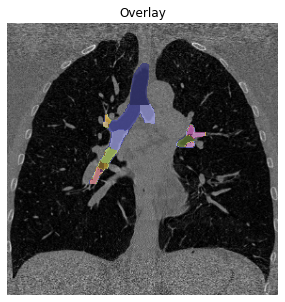

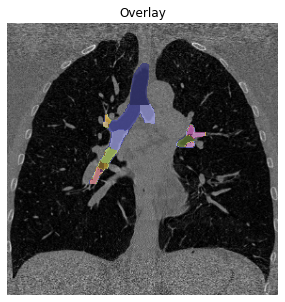

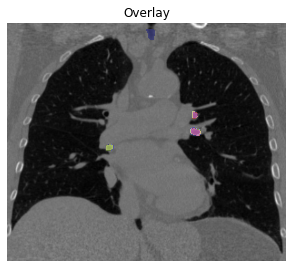

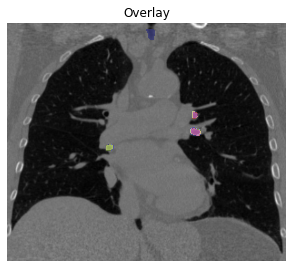

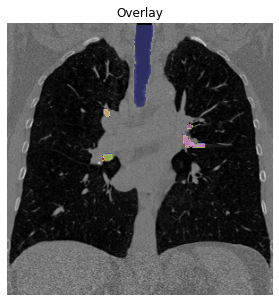

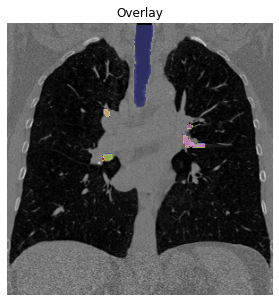

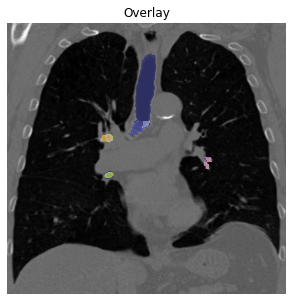

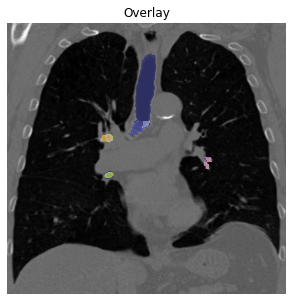

In [19]:
dice_loss = []
hausdorff = []

for i in range(len(predicted_seg_path)):

    itkimage = sitk.ReadImage(ct_scans_path[i])
    ct_scan = torch.tensor(sitk.GetArrayFromImage(itkimage))

    itkimage = sitk.ReadImage(predicted_seg_path[i])
    predicted_seg = torch.tensor(sitk.GetArrayFromImage(itkimage))

    itkimage = sitk.ReadImage(gt_seg_path[i])
    gt_seg = torch.tensor(sitk.GetArrayFromImage(itkimage))

    print(gt_seg.shape)

    dice_loss.append(dice_coeff(predicted_seg,gt_seg,33))
    hausdorff.append(compute_hausdorff(gt_seg,predicted_seg))

    plot_overlays(ct_scan, gt_seg,f'/content/drive/MyDrive/Colab Notebooks/overlays/Ovefrlay{i}.png')
    plot_overlays(ct_scan, predicted_seg,f'/content/drive/MyDrive/Colab Notebooks/overlays/Overlay{i}.png')

print(dice_loss)
print(hausdorff)

In [36]:
# Divide the labels into the four groups
trachea_ind = [0]
primary_ind = [1,3,4]
secondary_ind = [2,5,6,7,8,10,28]
tertiary_ind = [9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31]

In [65]:
dice = torch.stack(dice_loss,dim=1)
haus = torch.stack(hausdorff,dim=1)

## Create CSV Files

In [52]:
trachea_dice_mean = dice[trachea_ind].mean().item()
primary_dice_mean = dice[primary_ind].mean().item()
secondary_dice_mean = dice[secondary_ind].mean().item()
tertiary_dice_mean = dice[tertiary_ind].mean().item()
all_dice_avg = dice.mean().item()

d = {'Trachea':[trachea_dice_mean], 'Primary': [primary_dice_mean], 'Secondary': [secondary_dice_mean], 'Tertiary': [tertiary_dice_mean], 'All': [all_dice_avg]}
df = pd.DataFrame(d)
df.to_csv('results/dice_values.csv')

trachea_hausdorff = haus[trachea_ind].mean().item()
primary_hausdorff = haus[primary_ind].mean().item()
secondary_hausdorff = haus[secondary_ind].mean().item()
tertiary_hausdorff = haus[tertiary_ind].mean().item()
all_hausdorff = haus.mean().item()

d = {'Trachea':[trachea_hausdorff], 'Primary': [primary_hausdorff], 'Secondary': [secondary_hausdorff], 'Tertiary': [tertiary_hausdorff], 'All': [all_hausdorff]}
df = pd.DataFrame(d)
df.to_csv('results/hausdorff_values.csv')


## Create Boxplots

In [63]:
level_dice = [dice[trachea_ind].view(-1),dice[primary_ind].view(-1),dice[secondary_ind].view(-1),dice[tertiary_ind].view(-1)]
create_box_plot('Dice',level_dice,'results/dice_level.png')

<Figure size 432x288 with 0 Axes>

In [64]:
level_haus = [haus[trachea_ind].view(-1),haus[primary_ind].view(-1),haus[secondary_ind].view(-1),haus[tertiary_ind].view(-1)]
create_box_plot('Dice',level_haus,'results/haus_level.png')

<Figure size 432x288 with 0 Axes>